In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
import nltk
import string
import re
import inflect

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Reading the data amd converting it into a dataframe

In [26]:
data = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv')
data= pd.DataFrame(data)

Droping unnecessary columns

In [27]:
data=data.drop(['id','author','subreddit','link_id','parent_id','created_utc','rater_id','example_very_unclear'], axis=1)
data.shape

(70000, 29)

Droping the duplicates

In [28]:
data.drop_duplicates(subset='text', inplace=True)
data.reset_index(drop=True, inplace=True)
data.shape

(43182, 29)

Droping data with mixed emotions

In [29]:
sum = np.array(data.sum(axis=1))
ind = np.where(np.logical_or(sum>1, sum==0))[0].tolist()
data.drop(ind, inplace = True)
data.reset_index(drop=True, inplace=True)

<ipython-input-29-6ebe5110a2ba>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum = np.array(data.sum(axis=1))


Creating a list of emotions

In [30]:
emotions = list(data.columns)[1:]

In [31]:
emo = []
for text in range(0, 35034):
  for emotion in emotions:
    if data.loc[text][emotion] == 1:
      emo.append(emotion)


In [32]:
data.drop(data.iloc[:, 1:29], inplace=True, axis=1)

In [33]:
data

,text
0,That game hurt.
1,"You do right, if you don't care then fuck 'em!"
2,Man I love reddit.
3,"[NAME] was nowhere near them, he was by the Fa..."
4,Right? Considering it’s such an important docu...
...,...
35029,When I harass women with innuendo and they pol...
35030,"You’re good, no worries"
35031,"one's a rapist, and the other's a stingy yank ..."
35032,This is great! Can anyone make a request with ...


In [34]:
data['Emotions']= emo

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Emotion_id'] = le.fit_transform(data['Emotions'])

data

,text,Emotions,Emotion_id
0,That game hurt.,sadness,26
1,"You do right, if you don't care then fuck 'em!",neutral,20
2,Man I love reddit.,love,18
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20
4,Right? Considering it’s such an important docu...,gratitude,15
...,...,...,...
35029,When I harass women with innuendo and they pol...,neutral,20
35030,"You’re good, no worries",admiration,0
35031,"one's a rapist, and the other's a stingy yank ...",annoyance,3
35032,This is great! Can anyone make a request with ...,admiration,0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Emotion_id'>

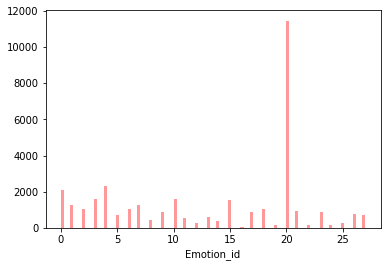

In [35]:
from seaborn import distplot

distplot(data['Emotion_id'], kde=False, color='red', bins=100)

Preprocessing the data

In [36]:
def text_lowercase(text):
	return text.lower()
 
import string
# remove punctuation
def remove_punctuation(text):
	return text.translate(str.maketrans('', '', string.punctuation))

Removing stop words

In [37]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
# remove stopwords function
def remove_stopwords_tokenize_and_stem(text):
	stop_words = set(stopwords.words("english"))
	word_tokens = word_tokenize(text)
	filtered_text = [word for word in word_tokens if word not in stop_words]
	stems = [stemmer.stem(word) for word in filtered_text]
	return stems

Stemming the data

In [38]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()

# stem words in the list of tokenized words
def stem_words(text):
	word_tokens = word_tokenize(text)
	stems = [stemmer.stem(word) for word in word_tokens]
	return stems

In [39]:
def text_preprocess(text):
  t = remove_punctuation(text)
  t = text_lowercase(t)
  t = remove_stopwords_tokenize_and_stem(t)
  return t

In [40]:
data

,text,Emotions,Emotion_id
0,That game hurt.,sadness,26
1,"You do right, if you don't care then fuck 'em!",neutral,20
2,Man I love reddit.,love,18
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20
4,Right? Considering it’s such an important docu...,gratitude,15
...,...,...,...
35029,When I harass women with innuendo and they pol...,neutral,20
35030,"You’re good, no worries",admiration,0
35031,"one's a rapist, and the other's a stingy yank ...",annoyance,3
35032,This is great! Can anyone make a request with ...,admiration,0


In [41]:
data['tokenized'] = data.apply(lambda x: text_preprocess(x['text']), axis=1)

In [42]:
data

,text,Emotions,Emotion_id,tokenized
0,That game hurt.,sadness,26,"[game, hurt]"
1,"You do right, if you don't care then fuck 'em!",neutral,20,"[right, dont, care, fuck, em]"
2,Man I love reddit.,love,18,"[man, love, reddit]"
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"[name, nowher, near, falcon]"
4,Right? Considering it’s such an important docu...,gratitude,15,"[right, consid, ’, import, document, know, dam..."
...,...,...,...,...
35029,When I harass women with innuendo and they pol...,neutral,20,"[harass, women, innuendo, polit, deflect, know..."
35030,"You’re good, no worries",admiration,0,"[’, good, worri]"
35031,"one's a rapist, and the other's a stingy yank ...",annoyance,3,"[one, rapist, other, stingi, yank, bit, differ..."
35032,This is great! Can anyone make a request with ...,admiration,0,"[great, anyon, make, request, draw]"


In [43]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

model = Word2Vec(window=5, min_count=2, workers=4, sg=0)

model.build_vocab(data['tokenized'], progress_per=1000)
model.train(data['tokenized'], total_examples=model.corpus_count, epochs=model.epochs)

model.save("./text.model")

In [44]:
model.wv.most_similar('best')

[('favorit', 0.9988812804222107),
 ('friend', 0.998817503452301),
 ('worst', 0.9988074898719788),
 ('sinc', 0.9987845420837402),
 ('past', 0.99873948097229),
 ('three', 0.9987030029296875),
 ('one', 0.9986205101013184),
 ('rememb', 0.9986110925674438),
 ('playoff', 0.9986106157302856),
 ('today', 0.9985777139663696)]

In [45]:
data

,text,Emotions,Emotion_id,tokenized
0,That game hurt.,sadness,26,"[game, hurt]"
1,"You do right, if you don't care then fuck 'em!",neutral,20,"[right, dont, care, fuck, em]"
2,Man I love reddit.,love,18,"[man, love, reddit]"
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"[name, nowher, near, falcon]"
4,Right? Considering it’s such an important docu...,gratitude,15,"[right, consid, ’, import, document, know, dam..."
...,...,...,...,...
35029,When I harass women with innuendo and they pol...,neutral,20,"[harass, women, innuendo, polit, deflect, know..."
35030,"You’re good, no worries",admiration,0,"[’, good, worri]"
35031,"one's a rapist, and the other's a stingy yank ...",annoyance,3,"[one, rapist, other, stingi, yank, bit, differ..."
35032,This is great! Can anyone make a request with ...,admiration,0,"[great, anyon, make, request, draw]"


In [46]:
data.to_csv('tokenized_text.csv')

In [49]:
df = pd.read_csv('tokenized_text.csv')
df

,Unnamed: 0,text,Emotions,Emotion_id,tokenized
0,0,That game hurt.,sadness,26,"['game', 'hurt']"
1,1,"You do right, if you don't care then fuck 'em!",neutral,20,"['right', 'dont', 'care', 'fuck', 'em']"
2,2,Man I love reddit.,love,18,"['man', 'love', 'reddit']"
3,3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"['name', 'nowher', 'near', 'falcon']"
4,4,Right? Considering it’s such an important docu...,gratitude,15,"['right', 'consid', '’', 'import', 'document',..."
...,...,...,...,...,...
35029,35029,When I harass women with innuendo and they pol...,neutral,20,"['harass', 'women', 'innuendo', 'polit', 'defl..."
35030,35030,"You’re good, no worries",admiration,0,"['’', 'good', 'worri']"
35031,35031,"one's a rapist, and the other's a stingy yank ...",annoyance,3,"['one', 'rapist', 'other', 'stingi', 'yank', '..."
35032,35032,This is great! Can anyone make a request with ...,admiration,0,"['great', 'anyon', 'make', 'request', 'draw']"
